In [1]:
%matplotlib inline
import pandas as pd
import os

In [2]:
runnum = 35
endyear = 2017
h5_location = './../runs/run{}.h5'.format(runnum)

In [3]:
store = pd.HDFStore(h5_location)
parcels_lid = store['base/parcels'][['large_area_id']]
lids = parcels_lid.large_area_id.unique()
years = range(2016, endyear + 1)

In [4]:
def filterdf(df, use):
    if use=='res':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft == 0)]
    elif use=='nonres':
        return df.loc[(df.residential_units == 0)
                      & (df.non_residential_sqft > 0)]
    elif use=='mixed':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft > 0)]
    else:
        return df

In [5]:
results = pd.DataFrame(index=parcels_lid.large_area_id.unique())

for use in ['res', 'nonres', 'mixed', 'total']:
    for year in years:
        buildings_name = '{}/buildings'.format(year)
        buildings = store[buildings_name]
        buildings = filterdf(buildings, use)
        b = buildings[['year_built', 'parcel_id']]
        b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
        b = b.loc[b.year_built == year]
        built_by_lid = b.groupby('large_area_id').count().year_built
        results[year] = built_by_lid
    results.to_csv('run{}_{}.csv'.format(runnum, use))

In [6]:
total = pd.read_csv('run{}_total.csv'.format(runnum), index_col=0)

In [7]:
total

,2016,2017
5,95,11
3,1517,256
125,7767,305
99,2075,128
161,1117,360
115,212,22
147,428,81
93,1262,204


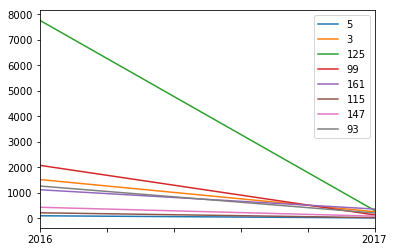

In [8]:
for l in lids:
    total.fillna(0).loc[l].plot(legend=True)

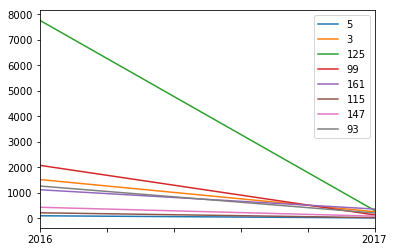

In [9]:
total_no_2020 = total[[c for c in total.columns if c not in ['2020']]]
for l in lids:
    total_no_2020.fillna(0).loc[l].plot(legend=True)
# total_no_2020

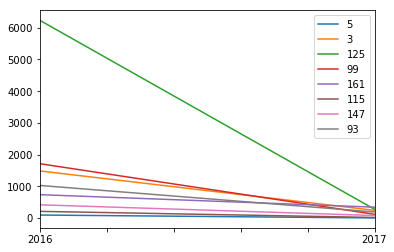

In [10]:
res = pd.read_csv('run{}_res.csv'.format(runnum), index_col=0)
for l in lids:
    res.fillna(0).loc[l].plot(legend=True)

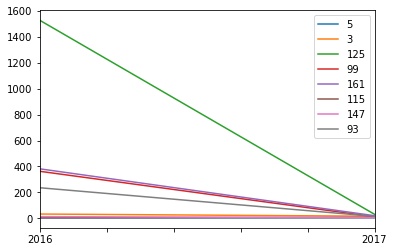

In [11]:
nonres = pd.read_csv('run{}_nonres.csv'.format(runnum), index_col=0)
for l in lids:
    nonres.fillna(0).loc[l].plot(legend=True)

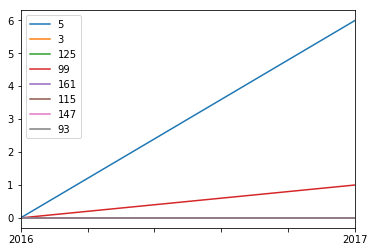

In [12]:
mixed = pd.read_csv('run{}_mixed.csv'.format(runnum), index_col=0)
for l in lids:
    mixed.fillna(0).loc[l].plot(legend=True)